In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.feature_selection import VarianceThreshold


In [2]:
# Load the XLSX file into a DataFrame
data = pd.read_excel("/Users/yarahatemibrahim/Downloads/data0.xlsx",header=0)

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_Sep_status,Pay_Aug_status,Pay_July_status,Pay_June_status,...,Bill_amount_June,Bill_amount_May,Bill_amount_April,Pay_amount_Sep,Pay_amount_Aug,Pay_amount_July,Pay_amount_June,Pay_amount_May,Pay_amount_April,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28065,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
28066,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
28067,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
28068,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [4]:
#renaming some columns to be more representative to our data
column_mapping = {
    'PAY_0':'Pay_Sep_status',
    'PAY_2':'Pay_Aug_status',
    'PAY_3':'Pay_July_status',
    'PAY_4':'Pay_June_status',
    'PAY_5':'Pay_May_status',
    'PAY_6':'Pay_April_status',
    'BILL_AMT1':"Bill_amount_Sep",
    'BILL_AMT2':"Bill_amount_Aug",
    'BILL_AMT3':"Bill_amount_July",
    'BILL_AMT4':"Bill_amount_June",
    'BILL_AMT5':"Bill_amount_May",
    'BILL_AMT6':"Bill_amount_April",
    'PAY_AMT1':'Pay_amount_Sep',
    'PAY_AMT2':'Pay_amount_Aug',
    'PAY_AMT3':'Pay_amount_July',
    'PAY_AMT4':'Pay_amount_June',
    'PAY_AMT5':'Pay_amount_May',
    'PAY_AMT6':'Pay_amount_April'

}

# Rename specific columns using the dictionary
data.rename(columns=column_mapping, inplace=True)

In [5]:
#show the first 20 rows of the data
data.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_Sep_status,Pay_Aug_status,Pay_July_status,Pay_June_status,...,Bill_amount_June,Bill_amount_May,Bill_amount_April,Pay_amount_Sep,Pay_amount_Aug,Pay_amount_July,Pay_amount_June,Pay_amount_May,Pay_amount_April,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
8,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
9,11,200000,2,3,2,34,0,0,2,0,...,2513,1828,3731,2306,12,50,300,3738,66,0


In [6]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_Sep_status,Pay_Aug_status,Pay_July_status,Pay_June_status,...,Bill_amount_June,Bill_amount_May,Bill_amount_April,Pay_amount_Sep,Pay_amount_Aug,Pay_amount_July,Pay_amount_June,Pay_amount_May,Pay_amount_April,default payment next month
28065,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
28066,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
28067,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
28068,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
28069,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
# Check for missing values
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Pay_Sep_status                0
Pay_Aug_status                0
Pay_July_status               0
Pay_June_status               0
Pay_May_status                0
Pay_April_status              0
Bill_amount_Sep               0
Bill_amount_Aug               0
Bill_amount_July              0
Bill_amount_June              0
Bill_amount_May               0
Bill_amount_April             0
Pay_amount_Sep                0
Pay_amount_Aug                0
Pay_amount_July               0
Pay_amount_June               0
Pay_amount_May                0
Pay_amount_April              0
default payment next month    0
dtype: int64


In [8]:
# Drop rows with missing values
data.dropna(inplace=True)

In [9]:
data.shape

(28070, 25)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28070 entries, 0 to 28069
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          28070 non-null  int64
 1   LIMIT_BAL                   28070 non-null  int64
 2   SEX                         28070 non-null  int64
 3   EDUCATION                   28070 non-null  int64
 4   MARRIAGE                    28070 non-null  int64
 5   AGE                         28070 non-null  int64
 6   Pay_Sep_status              28070 non-null  int64
 7   Pay_Aug_status              28070 non-null  int64
 8   Pay_July_status             28070 non-null  int64
 9   Pay_June_status             28070 non-null  int64
 10  Pay_May_status              28070 non-null  int64
 11  Pay_April_status            28070 non-null  int64
 12  Bill_amount_Sep             28070 non-null  int64
 13  Bill_amount_Aug             28070 non-null  int64
 14  Bill_a

In [11]:
print("Dataset dimensions:", data.shape)

Dataset dimensions: (28070, 25)


In [12]:
print("\nColumn names and data types:")
print(data.dtypes)


Column names and data types:
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
Pay_Sep_status                int64
Pay_Aug_status                int64
Pay_July_status               int64
Pay_June_status               int64
Pay_May_status                int64
Pay_April_status              int64
Bill_amount_Sep               int64
Bill_amount_Aug               int64
Bill_amount_July              int64
Bill_amount_June              int64
Bill_amount_May               int64
Bill_amount_April             int64
Pay_amount_Sep                int64
Pay_amount_Aug                int64
Pay_amount_July               int64
Pay_amount_June               int64
Pay_amount_May                int64
Pay_amount_April              int64
default payment next month    int64
dtype: object


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,28070.0,14998.389633,8645.755255,1.0,7522.50,15022.5,22441.50,30000.0
LIMIT_BAL,28070.0,164443.522622,128985.392370,10000.0,50000.00,140000.0,230000.00,1000000.0
SEX,28070.0,1.606306,0.488577,1.0,1.00,2.0,2.00,2.0
EDUCATION,28070.0,1.862273,0.787961,0.0,1.00,2.0,2.00,6.0
MARRIAGE,28070.0,1.551835,0.521922,0.0,1.00,2.0,2.00,3.0
AGE,28070.0,35.450374,9.242283,21.0,28.00,34.0,41.00,79.0
Pay_Sep_status,28070.0,0.012611,1.112784,-2.0,-1.00,0.0,0.00,8.0
Pay_Aug_status,28070.0,-0.074207,1.185770,-2.0,-1.00,0.0,0.00,8.0
Pay_July_status,28070.0,-0.111115,1.183514,-2.0,-1.00,0.0,0.00,8.0
Pay_June_status,28070.0,-0.164125,1.159742,-2.0,-1.00,0.0,0.00,8.0


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

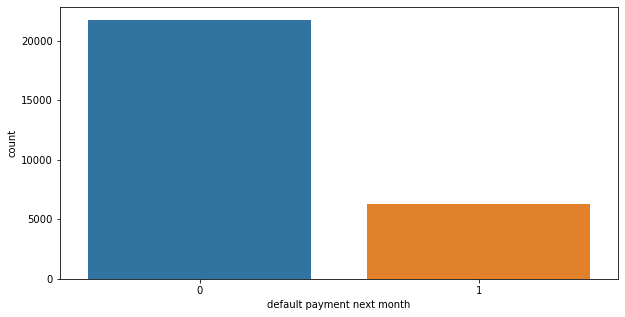

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default payment next month', data = data)

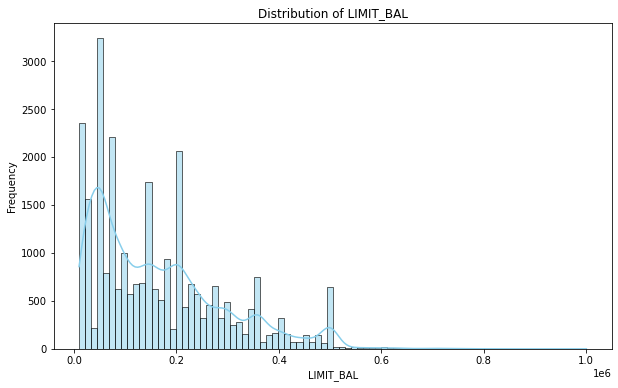

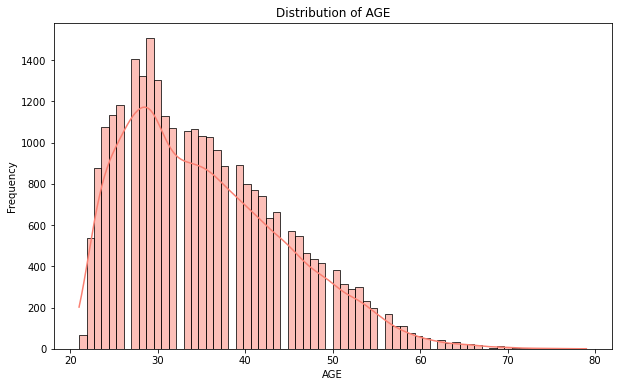

In [15]:
feature_colors = {'LIMIT_BAL': 'skyblue', 'AGE': 'salmon'}

features = ['LIMIT_BAL', 'AGE']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, color=feature_colors[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


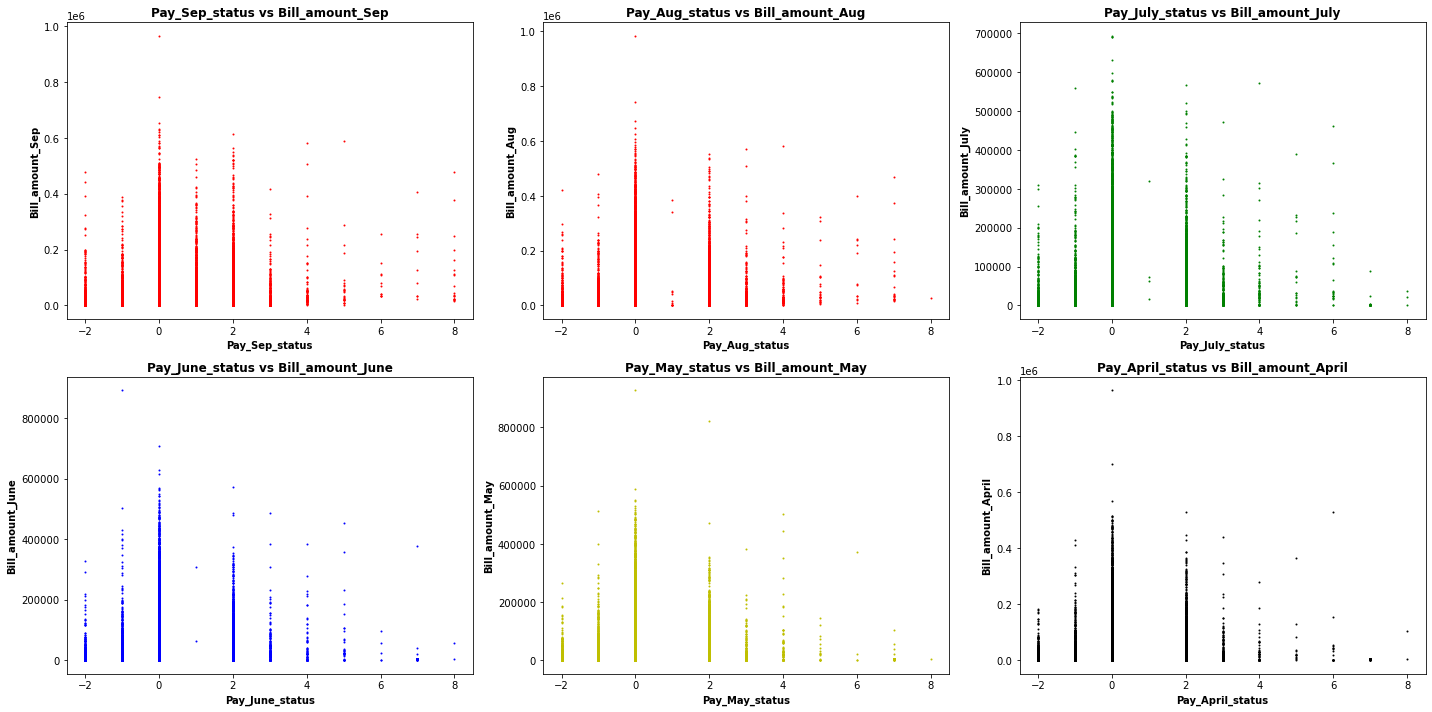

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.scatter(x=data['Pay_Sep_status'], y=data['Bill_amount_Sep'], c='r', s=1)
plt.title('Pay_Sep_status vs Bill_amount_Sep', fontweight='bold')
plt.xlabel('Pay_Sep_status', fontweight='bold')
plt.ylabel('Bill_amount_Sep', fontweight='bold')


plt.subplot(232)
plt.scatter(x=data['Pay_Aug_status'], y=data['Bill_amount_Aug'], c='r', s=1)
plt.title('Pay_Aug_status vs Bill_amount_Aug', fontweight='bold')
plt.xlabel('Pay_Aug_status', fontweight='bold')
plt.ylabel('Bill_amount_Aug', fontweight='bold')


plt.subplot(233)
plt.scatter(x=data['Pay_July_status'], y=data['Bill_amount_July'], c='g', s=1)
plt.title('Pay_July_status vs Bill_amount_July', fontweight='bold')
plt.xlabel('Pay_July_status', fontweight='bold')
plt.ylabel('Bill_amount_July', fontweight='bold')


plt.subplot(234)
plt.scatter(x=data['Pay_June_status'], y=data['Bill_amount_June'], c='b', s=1)
plt.title('Pay_June_status vs Bill_amount_June', fontweight='bold')
plt.xlabel('Pay_June_status', fontweight='bold')
plt.ylabel('Bill_amount_June', fontweight='bold')


plt.subplot(235)
plt.scatter(x=data['Pay_May_status'], y=data['Bill_amount_May'], c='y', s=1)
plt.title('Pay_May_status vs Bill_amount_May', fontweight='bold')
plt.xlabel('Pay_May_status', fontweight='bold')
plt.ylabel('Bill_amount_May', fontweight='bold')


plt.subplot(236)
plt.scatter(x=data['Pay_April_status'], y=data['Bill_amount_April'], c='black', s=1)
plt.title('Pay_April_status vs Bill_amount_April', fontweight='bold')
plt.xlabel('Pay_April_status', fontweight='bold')
plt.ylabel('Bill_amount_April', fontweight='bold')

plt.tight_layout()
plt.show()


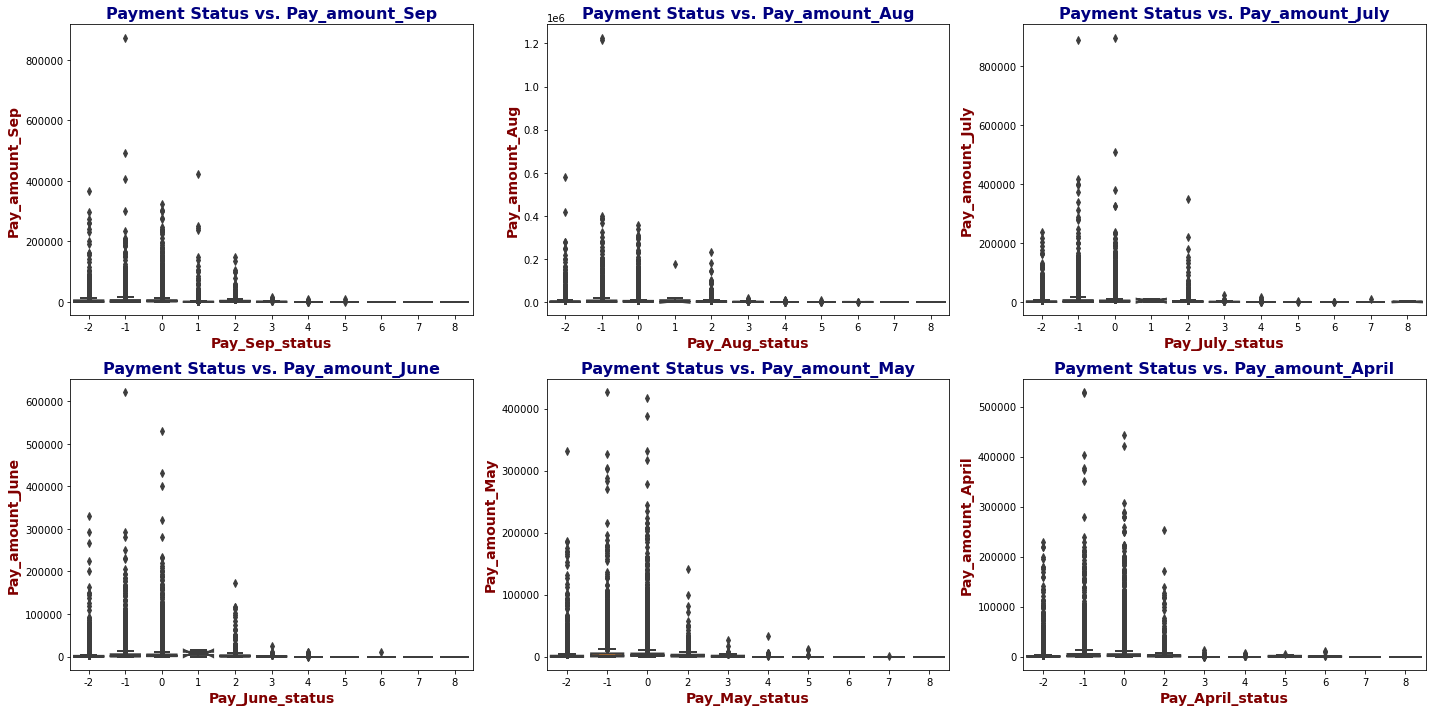

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
payment_status_columns = ['Pay_Sep_status', 'Pay_Aug_status', 'Pay_July_status', 'Pay_June_status', 'Pay_May_status', 'Pay_April_status']
payment_amount_columns = ['Pay_amount_Sep', 'Pay_amount_Aug', 'Pay_amount_July', 'Pay_amount_June', 'Pay_amount_May', 'Pay_amount_April']


plt.figure(figsize=(20, 10))


for i, (status_col, pay_amt_col) in enumerate(zip(payment_status_columns, payment_amount_columns)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=status_col, y=pay_amt_col, data=data, palette=custom_palette, linewidth=2, notch=True)
    plt.title(f'Payment Status vs. {pay_amt_col}', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel(status_col, fontsize=14, fontweight='bold', color='maroon')
    plt.ylabel(pay_amt_col, fontsize=14, fontweight='bold', color='maroon')

plt.tight_layout()
plt.show()


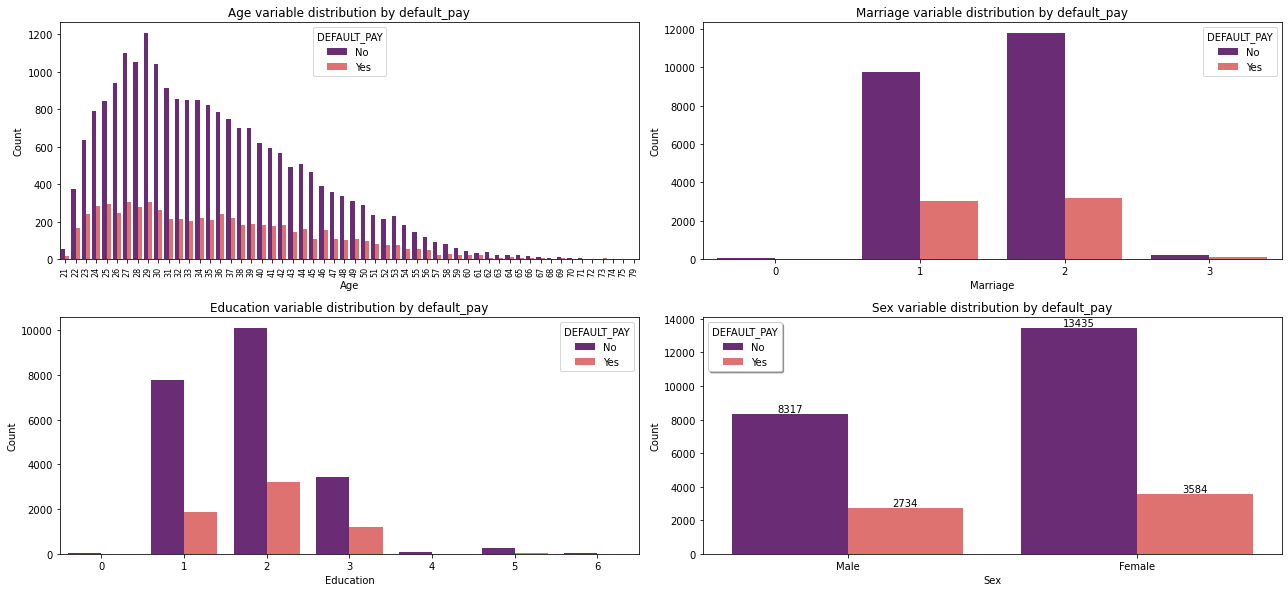

In [18]:

plt.figure(figsize=(18, 12))


plt.subplot(3, 2, 1)
age_plot = sns.countplot(data=data, x="AGE", hue="default payment next month", palette="magma")
plt.title("Age variable distribution by default_pay")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(['No', 'Yes'], title='DEFAULT_PAY')
age_plot.set_xticklabels(age_plot.get_xticklabels(), rotation=90, fontsize=8)


plt.subplot(3, 2, 2)
sns.countplot(data=data, x="MARRIAGE", hue="default payment next month", palette="magma")
plt.title("Marriage variable distribution by default_pay")
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.legend(['No', 'Yes'], title='DEFAULT_PAY')


plt.subplot(3, 2, 3)
sns.countplot(data=data, x="EDUCATION", hue="default payment next month", palette="magma")
plt.title("Education variable distribution by default_pay")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(['No', 'Yes'], title='DEFAULT_PAY')


plt.subplot(3, 2, 4)
sex_plot = sns.countplot(data=data, x="SEX", hue="default payment next month", palette="magma")
for label in sex_plot.containers:
    sex_plot.bar_label(label)
plt.xticks([0, 1], labels=["Male", "Female"])
plt.title("Sex variable distribution by default_pay")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(['No', 'Yes'], title='DEFAULT_PAY', loc='upper left', facecolor='white', shadow=True)

plt.tight_layout()
plt.show()


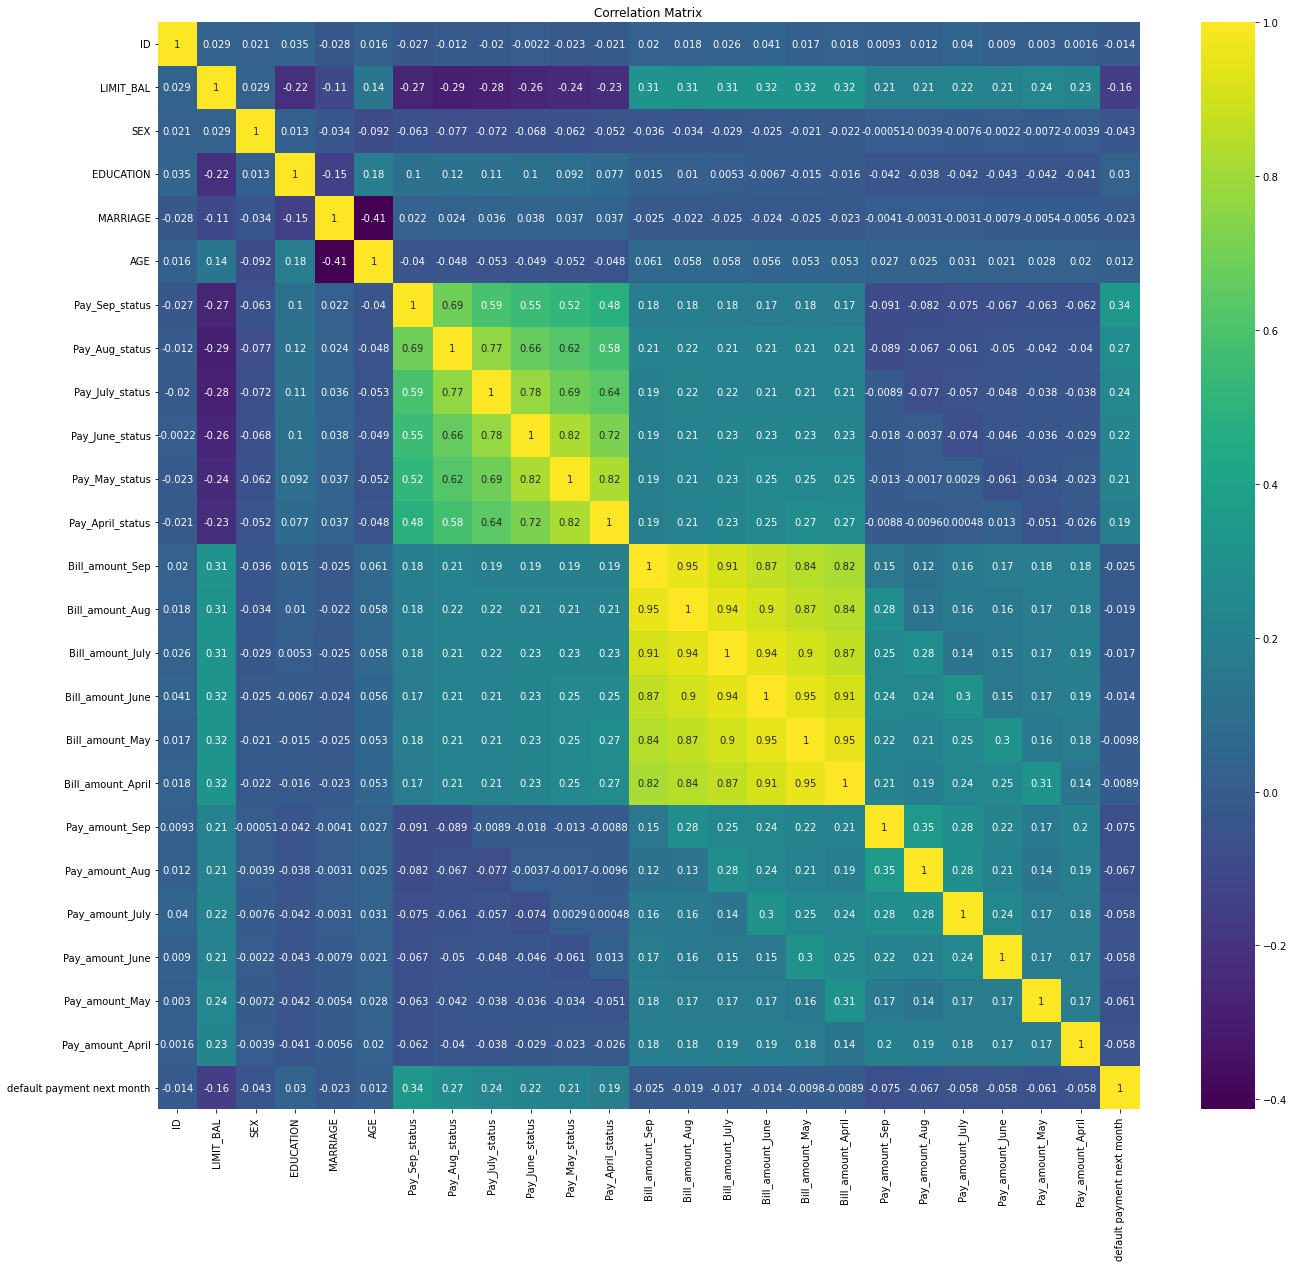

In [19]:
corr=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr,annot=True,cmap = 'viridis')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [20]:
columns_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE', 'Pay_Sep_status', 'Pay_Aug_status', 'Pay_July_status', 'Pay_June_status', 'Pay_May_status', 'Pay_April_status']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_Sep_status,Pay_Aug_status,Pay_July_status,Pay_June_status,...,Bill_amount_June,Bill_amount_May,Bill_amount_April,Pay_amount_Sep,Pay_amount_Aug,Pay_amount_July,Pay_amount_June,Pay_amount_May,Pay_amount_April,default payment next month
0,1,20000,1,2,1,24,4,4,1,1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,2,2,26,1,4,2,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,2,2,34,2,2,2,2,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,2,1,37,2,2,2,2,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,2,1,57,1,2,1,2,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
X=data.drop(["ID","default payment next month"],axis=1)
y = data['default payment next month']


In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data and labels

# Calculate mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y)

# Select the top k features with the highest mutual information
k = 16  # Adjust this value as needed
selector = SelectKBest(mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X, y)


In [23]:

selector = VarianceThreshold(threshold=0.5)

X_selected = selector.fit_transform(X)


In [24]:
X_selected.shape # variance selection failed 

(28070, 21)

In [25]:
selector_chi2 = SelectKBest(score_func=chi2, k=10)  # Select top 7 features using Chi-squared test
X_selected_chi2 = selector_chi2.fit_transform(X, y)
selected_chi2_cols = X.columns[selector_chi2.get_support()]


In [26]:
# Perform feature selection using ANOVA test
selector_anova = SelectKBest(score_func=f_classif, k=10)  # Select top 7 features using ANOVA test
X_selected_anova = selector_anova.fit_transform(X, y)
selected_anova_cols = X.columns[selector_anova.get_support()]


In [27]:

X_chi2 = pd.DataFrame(X_selected_chi2, columns=selected_chi2_cols)
X_anova = pd.DataFrame(X_selected_anova, columns=selected_anova_cols)

# Concatenate selected features
X_selected = pd.concat([X_chi2, X_anova], axis=1)
X_selected = X_selected.loc[:, ~X_selected.columns.duplicated()]

X_selected


,LIMIT_BAL,Bill_amount_Sep,Bill_amount_Aug,Bill_amount_July,Pay_amount_Sep,Pay_amount_Aug,Pay_amount_July,Pay_amount_June,Pay_amount_May,Pay_amount_April,Pay_Sep_status,Pay_Aug_status,Pay_July_status,Pay_June_status,Pay_May_status,Pay_April_status
0,20000,3913,3102,689,0,689,0,0,0,0,4,4,1,1,0,0
1,120000,2682,1725,2682,0,1000,1000,1000,0,2000,1,4,2,2,2,3
2,90000,29239,14027,13559,1518,1500,1000,1000,1000,5000,2,2,2,2,2,2
3,50000,46990,48233,49291,2000,2019,1200,1100,1069,1000,2,2,2,2,2,2
4,50000,8617,5670,35835,2000,36681,10000,9000,689,679,1,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28065,80000,72557,77708,79384,7000,3500,0,7000,0,4000,4,4,4,4,3,3
28066,220000,188948,192815,208365,8500,20000,5003,3047,5000,1000,2,2,2,2,2,2
28067,150000,1683,1828,3502,1837,3526,8998,129,0,0,1,1,1,1,2,2
28068,30000,3565,3356,2758,0,0,22000,4200,2000,3100,6,5,4,1,2,2


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=10)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(22456, 16)

## Dimension Reduction

In [30]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_train_scaled)
X_test=pca.fit_transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
X_pca

Explained variance ratio: [0.26225467 0.23569203 0.12776194 0.08225539 0.04862263 0.04489405
 0.04118642 0.03549118 0.03298766 0.03146308 0.0219622  0.01400088]


array([[-1.26381729,  2.59255964,  3.65635278, ..., -0.64129172,
        -0.34760656, -0.31453931],
       [-1.96039464,  0.10009892,  0.83531666, ...,  1.02983425,
         0.19760417,  0.03212771],
       [ 0.75546272,  0.1769452 , -0.46915017, ...,  0.51807723,
        -0.0370977 , -0.05021318],
       ...,
       [-0.05877268,  1.94754193,  2.42899037, ...,  0.07112902,
         0.10334141,  0.03498932],
       [ 3.10732407, -2.38897923,  0.80105468, ..., -0.23096471,
         0.50614259, -0.07927563],
       [-3.53086654,  0.00539652, -0.94183845, ..., -1.15146396,
        -1.25018325,  0.69192001]])